In [74]:
import numpy as np
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

excel_file_path = '/Users/kimjuhwan/Desktop/Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.xlsx'

df = pd.read_excel(excel_file_path)

In [75]:
df.keys()

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [6]:
print(df["Area"])

0       56276
1       76631
2       71623
3       66458
4       66107
        ...  
2495    79637
2496    69647
2497    87994
2498    80011
2499    84934
Name: Area, Length: 2500, dtype: int64


In [8]:
print(df["Aspect_Ration"])

0       1.4809
1       1.7811
2       2.0651
3       1.7146
4       1.7413
         ...  
2495    2.7996
2496    2.4134
2497    2.2828
2498    2.4513
2499    1.9735
Name: Aspect_Ration, Length: 2500, dtype: float64


In [10]:
print(df["Aspect_Ration"], df["Compactness"])

0       1.4809
1       1.7811
2       2.0651
3       1.7146
4       1.7413
         ...  
2495    2.7996
2496    2.4134
2497    2.2828
2498    2.4513
2499    1.9735
Name: Aspect_Ration, Length: 2500, dtype: float64 0       0.8207
1       0.7487
2       0.6929
3       0.7624
4       0.7557
         ...  
2495    0.5973
2496    0.6433
2497    0.6599
2498    0.6359
2499    0.7104
Name: Compactness, Length: 2500, dtype: float64


In [47]:
df_data = pd.concat([df["Aspect_Ration"], df["Compactness"],df["Major_Axis_Length"],df["Minor_Axis_Length"]], axis =1)

In [48]:
df_data

,Aspect_Ration,Compactness,Major_Axis_Length,Minor_Axis_Length
0,1.4809,0.8207,326.1485,220.2388
1,1.7811,0.7487,417.1932,234.2289
2,2.0651,0.6929,435.8328,211.0457
3,1.7146,0.7624,381.5638,222.5322
4,1.7413,0.7557,383.8883,220.4545
...,...,...,...,...
2495,2.7996,0.5973,533.1513,190.4367
2496,2.4134,0.6433,462.9416,191.8210
2497,2.2828,0.6599,507.2200,222.1872
2498,2.4513,0.6359,501.9065,204.7531


In [28]:
print(df["Class"])

0          Çerçevelik
1          Çerçevelik
2          Çerçevelik
3          Çerçevelik
4          Çerçevelik
            ...      
2495    Ürgüp Sivrisi
2496    Ürgüp Sivrisi
2497    Ürgüp Sivrisi
2498    Ürgüp Sivrisi
2499    Ürgüp Sivrisi
Name: Class, Length: 2500, dtype: object


In [31]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
df["Class"] = label.fit_transform(df['Class'])
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0


In [37]:
data_target = df["Class"]

In [38]:
df_target = pd.DataFrame(data=data_target, columns=['Class'])

In [39]:
df_target

,Class
0,0
1,0
2,0
3,0
4,0
...,...
2495,1
2496,1
2497,1
2498,1


In [49]:
df_data.columns

Index(['Aspect_Ration', 'Compactness', 'Major_Axis_Length',
       'Minor_Axis_Length'],
      dtype='object')

In [50]:
df_data.isna().sum()

Aspect_Ration        0
Compactness          0
Major_Axis_Length    0
Minor_Axis_Length    0
dtype: int64

In [51]:
df_target.isna().sum()

Class    0
dtype: int64

In [52]:
df_data = pd.concat([df_data, df_target], axis=1)

In [53]:
df_data

,Aspect_Ration,Compactness,Major_Axis_Length,Minor_Axis_Length,Class
0,1.4809,0.8207,326.1485,220.2388,0
1,1.7811,0.7487,417.1932,234.2289,0
2,2.0651,0.6929,435.8328,211.0457,0
3,1.7146,0.7624,381.5638,222.5322,0
4,1.7413,0.7557,383.8883,220.4545,0
...,...,...,...,...,...
2495,2.7996,0.5973,533.1513,190.4367,1
2496,2.4134,0.6433,462.9416,191.8210,1
2497,2.2828,0.6599,507.2200,222.1872,1
2498,2.4513,0.6359,501.9065,204.7531,1


<Axes: xlabel='Minor_Axis_Length', ylabel='Density'>

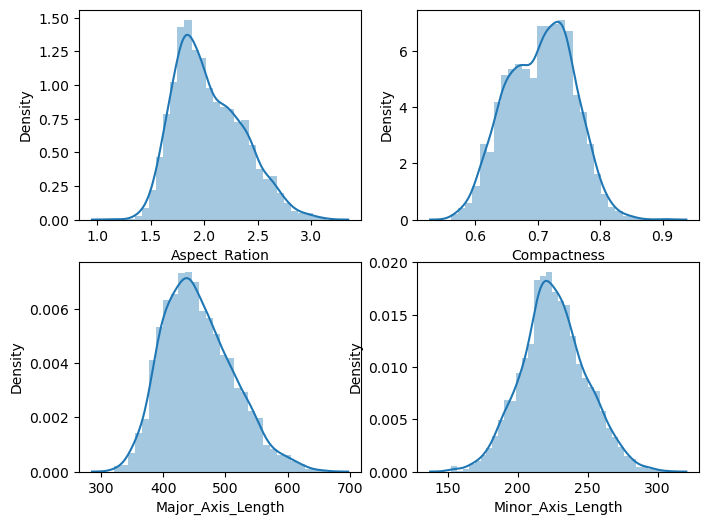

In [54]:
f, axes = plt.subplots(2,2, figsize=(8,6))
sns.distplot(df_data['Aspect_Ration'], ax = axes[0,0])
sns.distplot(df_data['Compactness'], ax = axes[0,1])
sns.distplot(df_data['Major_Axis_Length'], ax = axes[1,0])
sns.distplot(df_data['Minor_Axis_Length'], ax = axes[1,1])

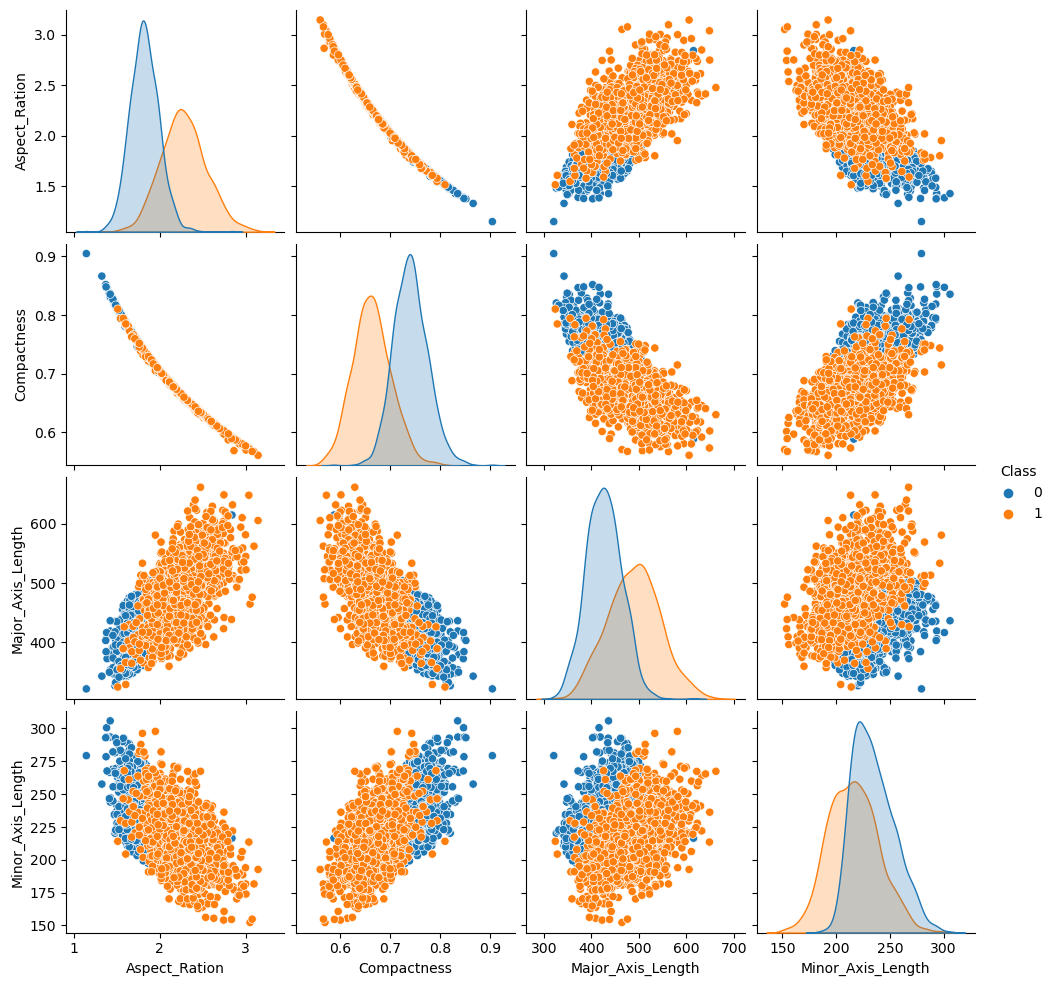

In [57]:
sns.pairplot(df_data,vars=['Aspect_Ration','Compactness','Major_Axis_Length','Minor_Axis_Length'], hue='Class')
plt.show()

<Axes: title={'center': 'Analyze Correlation of Features'}>

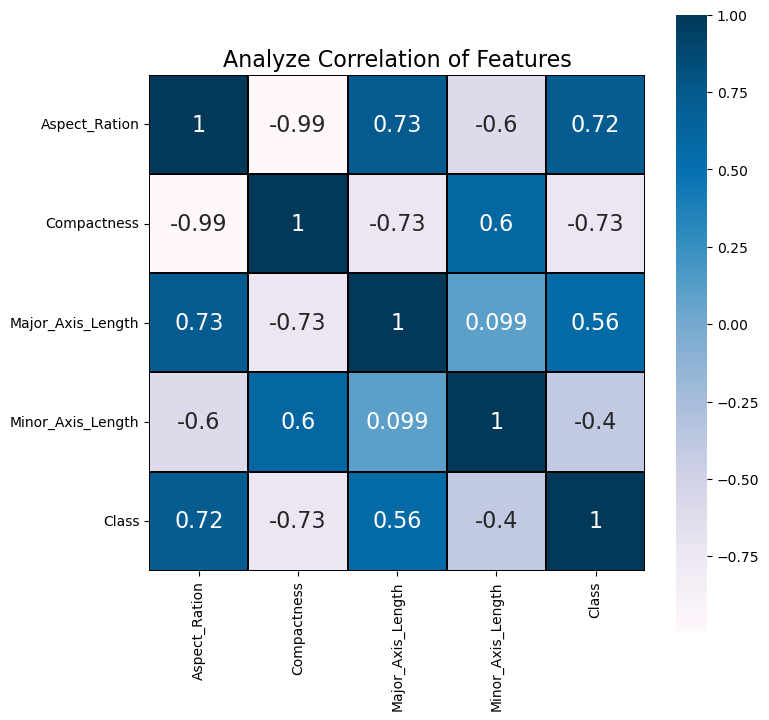

In [59]:
colormap = plt.cm.PuBu
plt.figure(figsize=(8,8))
plt.title("Analyze Correlation of Features", y=1.0, size=16)
sns.heatmap(df_data.astype(float).corr(), linewidths =0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor= "black", annot=True, annot_kws={"size":16})

In [60]:
x = df_data
x = x.drop(columns=['Class'], axis=1)

In [61]:
x

,Aspect_Ration,Compactness,Major_Axis_Length,Minor_Axis_Length
0,1.4809,0.8207,326.1485,220.2388
1,1.7811,0.7487,417.1932,234.2289
2,2.0651,0.6929,435.8328,211.0457
3,1.7146,0.7624,381.5638,222.5322
4,1.7413,0.7557,383.8883,220.4545
...,...,...,...,...
2495,2.7996,0.5973,533.1513,190.4367
2496,2.4134,0.6433,462.9416,191.8210
2497,2.2828,0.6599,507.2200,222.1872
2498,2.4513,0.6359,501.9065,204.7531


In [62]:
y = df_data["Class"]

In [63]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2500, dtype: int64

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1875, 4), (625, 4), (1875,), (625,))

In [65]:
# SVM
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(x_train, y_train)

pred_svm = clf_svm.predict(x_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.8448
[[286  35]
 [ 62 242]]


In [67]:
#LR

from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(x_train, y_train)

pred_lr = clf_lr.predict(x_test)

print("\n--- Logistic Regression Classifier ---")
print(accuracy_score(y_test, pred_lr))
print(confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.848
[[279  42]
 [ 53 251]]


In [68]:
from sklearn.tree import DecisionTreeClassifier

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(x_train, y_train)

pred_dt = clf_dt.predict(x_test)

print("\n--- Decision Tree Classifier ---")
print(accuracy_score(y_test, pred_dt))
print(confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.8176
[[262  59]
 [ 55 249]]


In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

print("\n--- Random Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(x_train, y_train)
pred = rf_clf.predict(x_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test, pred))


--- Random Forest ---
0.8496
[[277  44]
 [ 50 254]]
